# In this notebook we present all of the alrogithms used in Chapter 3 Epidemiological Modelling 

## 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Compartmental Models

Below we define the Euler approximation algorithm to the basic compartmental SIR model

In [88]:
def sir_model(N, T, dt, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/dt)
    S0, I0, R0 = X0
    beta, gamma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + dt*(-beta*S[t-1]*I[t-1]/N)
        I[t] = I[t-1] + dt*(beta*S[t-1]*I[t-1]/N - gamma*I[t-1])
        R[t] = R[t-1] + dt*(gamma*I[t-1])
    
    return S,I,R

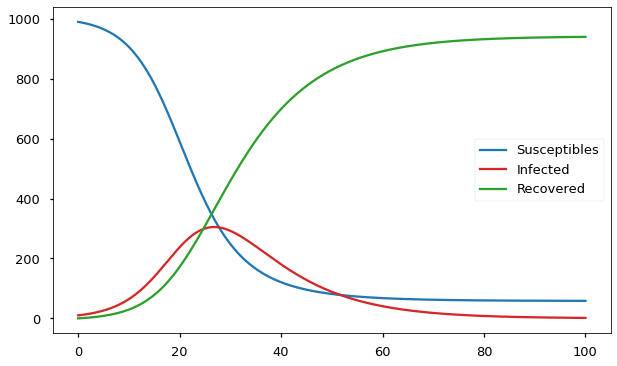

In [89]:
N = 1000 #Total population
T = 100 #Total number of days to simulate
dt = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate 

#Initial conditions
I0 = 10
S0 = N - I0
R0 = 0

X0 = (S0, I0, R0)
params = (beta, gamma)

S,I,R = sir_model(N, T, dt, X0, params)

# Plot the results
time = np.linspace(0,T,int(T/dt))
plt.style.use('seaborn-talk')
plt.figure(figsize=(10, 6))
plt.plot(time, S, label='Susceptibles', color='#1f77b4')
plt.plot(time, I, label='Infected', color = '#d62728')
plt.plot(time, R, label='Recovered', color='#2ca02c')
plt.legend()
plt.show()

Following the same approach as above, we can also define an algorithm for our SEIR and SEIRDS models

In [90]:
def seir_model(N, T, dt, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/dt)
    S0, E0, I0, R0 = X0
    beta, gamma, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + dt*(-beta*S[t-1]*I[t-1]/N)
        E[t] = E[t-1] + dt*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + dt*(sigma*E[t-1] - gamma*I[t-1])
        R[t] = R[t-1] + dt*(gamma*I[t-1])
    
    return S,E,I,R

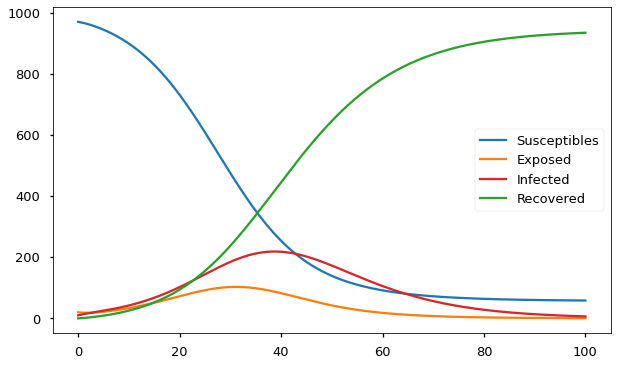

In [91]:
N = 1000 #Total population
T = 100 #Total number of days to simulate
dt = 1/10 #Step size for state computation
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate
sigma = 0.25 #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0

X0 = (S0, E0, I0, R0)
params = (beta, gamma, sigma)

S,E,I,R = seir_model(N, T, dt, X0, params)

#Plot the results
time = np.linspace(0,T,int(T/dt))
plt.style.use('seaborn-talk')
plt.figure(figsize=(10, 6))
plt.plot(time, S, label='Susceptibles', color='#1f77b4')
plt.plot(time, E, label='Exposed', color = '#ff7f0e')
plt.plot(time, I, label='Infected', color = '#d62728')
plt.plot(time, R, label='Recovered', color='#2ca02c')
plt.legend()
plt.show()

In [92]:
def seirds_model(N, T, dt, X0, params):
    #Define total number of time steps, initial conditions and model parameters
    num_steps = int(T/dt)
    S0, E0, I0, R0, D0 = X0
    alpha, beta, gamma, mu, sigma = params
    
    #Initialize state variables
    S = np.zeros(num_steps)
    E = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    D = np.zeros(num_steps)

    
    S[0] = S0
    E[0] = E0
    I[0] = I0
    R[0] = R0    
    D[0] = D0
    
    #Sequentially compute state values
    for t in range(1,num_steps):
        S[t] = S[t-1] + dt*(-beta*S[t-1]*I[t-1]/N + alpha*R[t-1])
        E[t] = E[t-1] + dt*(beta*S[t-1]*I[t-1]/N - sigma*E[t-1])
        I[t] = I[t-1] + dt*(sigma*E[t-1] - gamma*I[t-1] - mu*I[t-1])
        R[t] = R[t-1] + dt*(gamma*I[t-1] - alpha*R[t-1])
        D[t] = D[t-1] + dt*(mu*I[t-1])
    
    return S,E,I,R,D

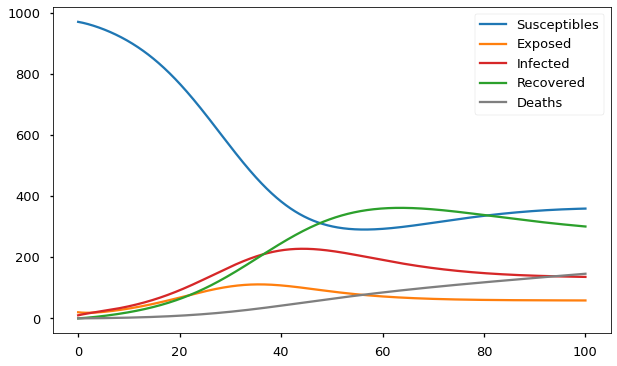

In [93]:
N = 1000 #Total population
T = 100 #Total number of days to simulate
dt = 1/10 #Step size for state computation
alpha = 1/20 #Reinfection rate
gamma = 0.1 #Recovery rate
beta = 0.3 #Infection rate
mu = 0.01 #Mortality Rate
sigma = 0.25 #Latency rate 

#Initial conditions
I0 = 10
E0 = 20
S0 = N - I0 - E0
R0 = 0
D0 = 0

X0 = (S0, E0, I0, R0, D0)
params = (alpha, beta, gamma, mu, sigma)

S,E,I,R,D = seirds_model(N, T, dt, X0, params)

#Plot the results
time = np.linspace(0,T,int(T/dt))
plt.style.use('seaborn-talk')
plt.figure(figsize=(10, 6))
plt.plot(time, S, label='Susceptibles', color='#1f77b4')
plt.plot(time, E, label='Exposed', color = '#ff7f0e')
plt.plot(time, I, label='Infected', color = '#d62728')
plt.plot(time, R, label='Recovered', color='#2ca02c')
plt.plot(time, D, label='Deaths', color='#7f7f7f')
plt.legend()
plt.show()